<a href="https://colab.research.google.com/github/ArthurTerozendi/classificador-pefil-voto-candidato/blob/main/classificador_pefil_voto_candidato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clonando repositório

In [3]:
!git clone https://github.com/ArthurTerozendi/classificador-pefil-voto-candidato.git

fatal: destination path 'classificador-pefil-voto-candidato' already exists and is not an empty directory.


# Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
bem_candidatos = pd.read_csv('classificador-pefil-voto-candidato/database/bem_candidato_2022_MG.csv', ',', encoding='latin1', usecols=['SQ_CANDIDATO', 'VR_BEM_CANDIDATO'])
consulta_cand = pd.read_csv('classificador-pefil-voto-candidato/database/consulta_cand_2022_MG.csv', ',', encoding='latin1', usecols=['DS_CARGO', 'SQ_CANDIDATO', 'NM_CANDIDATO', 'DT_NASCIMENTO', 'DS_GENERO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'DS_OCUPACAO'])

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
print(len(bem_candidatos), len(consulta_cand))

8548 2562


- Somatório do valor dos bens de cada canditado

In [7]:
bem_candidatos['VR_BEM_CANDIDATO'] = bem_candidatos['VR_BEM_CANDIDATO'].apply(lambda x: x.replace(',', '.'))
bem_candidatos['VR_BEM_CANDIDATO'] = pd.to_numeric(bem_candidatos['VR_BEM_CANDIDATO'], downcast='float')
bem_candidatos_sum = bem_candidatos.groupby(['SQ_CANDIDATO']).sum()
bem_candidatos_sum

,VR_BEM_CANDIDATO
SQ_CANDIDATO,
130001595976,2.195987e+07
130001595978,5.700000e+05
130001595979,3.332248e+05
130001595983,9.090000e+05
130001595984,2.073415e+06
...,...
130001737057,5.000000e+05
130001737059,1.500000e+04
130001737060,1.360000e+04


- Pegando apenas os Deputados

In [8]:
dEstadual = consulta_cand.query("DS_CARGO == 'DEPUTADO ESTADUAL'", inplace=False)
dFederal = consulta_cand.query("DS_CARGO == 'DEPUTADO FEDERAL'", inplace=False)
deputados = pd.concat([dEstadual, dFederal])
deputados

,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,DT_NASCIMENTO,DS_GENERO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO
3,DEPUTADO ESTADUAL,130001607719,JARDEL MOIA MONTEIRO,24/01/1984,MASCULINO,CASADO(A),PARDA,OUTROS
5,DEPUTADO ESTADUAL,130001615626,REINALDO LUCIO DA SILVA,30/08/1972,MASCULINO,CASADO(A),PARDA,OUTROS
6,DEPUTADO ESTADUAL,130001634278,ELIES GOMES COSTA,23/02/1997,MASCULINO,CASADO(A),PARDA,EMPRESï¿½RIO
9,DEPUTADO ESTADUAL,130001669318,JOSE GONZAGA DE SOUZA,19/05/1961,MASCULINO,CASADO(A),PRETA,LOCUTOR E COMENTARISTA DE Rï¿½DIO E TELEVISï¿½...
13,DEPUTADO ESTADUAL,130001607418,SILVIA DA CRUZ MESSIAS,13/08/1964,FEMININO,CASADO(A),BRANCA,VEREADOR
...,...,...,...,...,...,...,...,...
2549,DEPUTADO FEDERAL,130001607279,DINEY LENON DE PAULO,16/06/1981,MASCULINO,SOLTEIRO(A),BRANCA,PROFESSOR DE ENSINO Mï¿½DIO
2551,DEPUTADO FEDERAL,130001606187,ANGELITA MOREIRA ROCHA,20/09/1966,FEMININO,SOLTEIRO(A),BRANCA,APOSENTADO (EXCETO SERVIDOR Pï¿½BLICO)
2552,DEPUTADO FEDERAL,130001606191,ERICK SANTOS NAZARETH,20/12/1980,MASCULINO,CASADO(A),PARDA,EMPRESï¿½RIO
2553,DEPUTADO FEDERAL,130001607565,RICARDO GONï¿½ALVES CAMPOS,13/11/1970,MASCULINO,CASADO(A),BRANCA,ENGENHEIRO


- Junção das duas tabelas

In [9]:
registroCand = pd.merge(deputados, bem_candidatos_sum, how='left', left_on='SQ_CANDIDATO', right_on='SQ_CANDIDATO')
registroCand

,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,DT_NASCIMENTO,DS_GENERO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_BEM_CANDIDATO
0,DEPUTADO ESTADUAL,130001607719,JARDEL MOIA MONTEIRO,24/01/1984,MASCULINO,CASADO(A),PARDA,OUTROS,3.490000e+04
1,DEPUTADO ESTADUAL,130001615626,REINALDO LUCIO DA SILVA,30/08/1972,MASCULINO,CASADO(A),PARDA,OUTROS,2.200000e+04
2,DEPUTADO ESTADUAL,130001634278,ELIES GOMES COSTA,23/02/1997,MASCULINO,CASADO(A),PARDA,EMPRESï¿½RIO,6.800000e+05
3,DEPUTADO ESTADUAL,130001669318,JOSE GONZAGA DE SOUZA,19/05/1961,MASCULINO,CASADO(A),PRETA,LOCUTOR E COMENTARISTA DE Rï¿½DIO E TELEVISï¿½...,NaN
4,DEPUTADO ESTADUAL,130001607418,SILVIA DA CRUZ MESSIAS,13/08/1964,FEMININO,CASADO(A),BRANCA,VEREADOR,1.592013e+05
...,...,...,...,...,...,...,...,...,...
2509,DEPUTADO FEDERAL,130001607279,DINEY LENON DE PAULO,16/06/1981,MASCULINO,SOLTEIRO(A),BRANCA,PROFESSOR DE ENSINO Mï¿½DIO,NaN
2510,DEPUTADO FEDERAL,130001606187,ANGELITA MOREIRA ROCHA,20/09/1966,FEMININO,SOLTEIRO(A),BRANCA,APOSENTADO (EXCETO SERVIDOR Pï¿½BLICO),NaN
2511,DEPUTADO FEDERAL,130001606191,ERICK SANTOS NAZARETH,20/12/1980,MASCULINO,CASADO(A),PARDA,EMPRESï¿½RIO,4.500000e+04
2512,DEPUTADO FEDERAL,130001607565,RICARDO GONï¿½ALVES CAMPOS,13/11/1970,MASCULINO,CASADO(A),BRANCA,ENGENHEIRO,2.537668e+06


- Quantidade de deputados estaduais e federais respectivamente

([<matplotlib.patches.Wedge at 0x7fefdec18370>,
 [Text(-0.631153739375505, 3.2390808815576553, 'DEPUTADO ESTADUAL'),
  Text(0.631153436110864, -3.239080940650519, 'DEPUTADO FEDERAL')],
 [Text(-0.3442656760230027, 1.766771389940539, '56.13'),
  Text(0.34426551060592575, -1.7667714221730102, '43.87')])

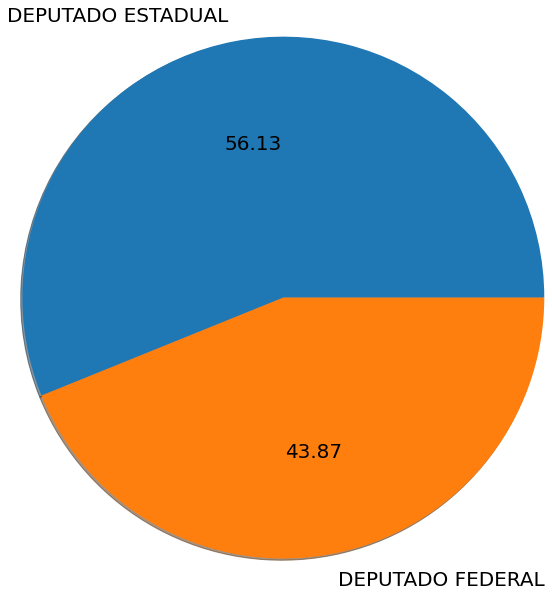

In [29]:
from numpy.lib.shape_base import tile
num_cargos = registroCand['DS_CARGO'].value_counts()
plt.pie(x=num_cargos, labels=['DEPUTADO ESTADUAL', 'DEPUTADO FEDERAL'], autopct='%.2f', shadow=True, radius=3, textprops={'fontsize': 20}, )

([<matplotlib.patches.Wedge at 0x7fefdebeea30>,
 [Text(-1.6392743945497714, 2.864049486194937, 'MASCULINO'),
  Text(1.639274394549771, -2.8640494861949373, 'FEMININO')],
 [Text(-0.8941496697544206, 1.5622088106517835, '66.55'),
  Text(0.8941496697544203, -1.5622088106517837, '33.45')])

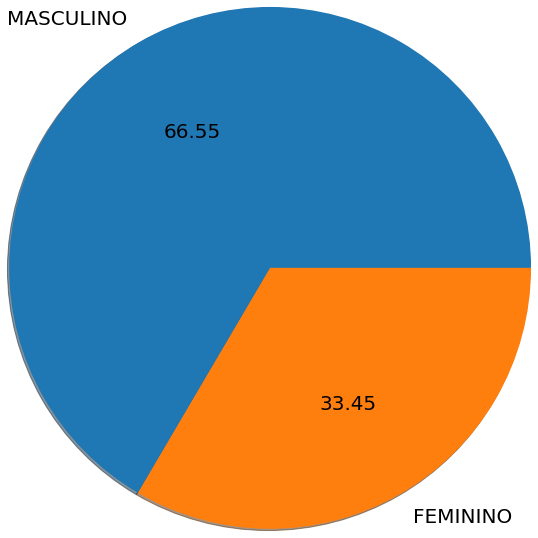

In [30]:
num_genero = registroCand['DS_GENERO'].value_counts()
plt.pie(x=num_genero, labels=['MASCULINO', 'FEMININO'], autopct='%.2f', shadow=True, radius=3, textprops={'fontsize': 20}, )

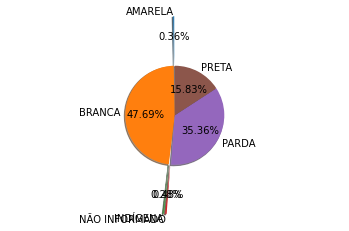

In [53]:
num_cor_raca = registroCand['DS_COR_RACA'].value_counts()
num_cor_raca_labels = ['AMARELA', 'BRANCA', 'INDÍGENA', 'NÃO INFORMADO', 'PARDA', 'PRETA']
num_cor_raca_value = [num_cor_raca.AMARELA, num_cor_raca.BRANCA, num_cor_raca['INDï¿½GENA'], num_cor_raca['Nï¿½O INFORMADO'], num_cor_raca.PARDA, num_cor_raca.PRETA]
fig1, ax1 = plt.subplots()
explode = (1, 0, 1, 1, 0, 0)
ax1.pie(num_cor_raca_value, explode=explode, labels=num_cor_raca_labels, autopct='%.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [13]:
registroCand.to_csv('classificador-pefil-voto-candidato/database/registro_candidato.csv')